In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

#plt.style.reload_library()
plt.style.use(['science','notebook','ieee','grid'])

In [2]:
scores = np.genfromtxt('all_scores.txt')

plt.rcParams.update({'font.size': 48})
plt.figure(figsize=(15,10))
#plt.hist(scores[:,1], density=1,, bins=len(scores), cumulative = 1 histtype='step');
plt.hist(scores[:,1], bins=48);
plt.xlabel('Cluster score')
plt.ylabel('Frequency')
plt.title('Cluster score distribution')
#plt.axhline(y=0.5, color='r', linestyle='-')

#plt.axvline(x=500, color='g', linestyle='-.')
#plt.axvline(x=1000, color='r', linestyle='-.')
#plt.axvline(x=920, color='y', linestyle='-.')


FileNotFoundError: all_scores.txt not found.

## Plot scaled area (weighted sum over all SAs )vs acutal cluster sasa

In [3]:
sasas = np.genfromtxt('all_sasa.txt')
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.scatter(sasas,scores[:,1])
plt.xlim([0, 8000])
plt.ylim([0, 8000])
plt.xlabel('Cluster SASA')
plt.ylabel('Cluster score')

FileNotFoundError: all_sasa.txt not found.

## Plot CDF

In [ ]:
scores = np.genfromtxt('all_scores.txt')

sorted_scores = np.sort(scores[:,1])
index = np.arange(len(sorted_scores))

gradient = np.gradient(sorted_scores)

plt.figure(figsize=(15,10))
plt.plot(sorted_scores, index/max(index))
plt.xlabel('Cluster Score')
plt.ylabel('Cluster #')
plt.title('Cumulative score distribution')

plt.axhline(y=0.5, color='r', linestyle='-')
#plt.axvline(x=1000, color='r', linestyle='-.')
#plt.axvline(x=920, color='y', linestyle='-.', label='980')

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(gradient)

## Notes
1. Define those patches as active hotspots whose area is greater than 920 A^2 
2. Other patches are passive hotspots
3. Used 920 as cutoff since, 50 % of clusters have more area than this. and also there is a break in the distribution plot.
4. Might fit to a guassian and later use \mu + \sigma

## Fitting a half gaussian to the distribution

mu, sigma = sp.stats.halfnorm.fit(scores[:,1])
best_fit_line = sp.stats.halfnorm.pdf(bins, mu, sigma)

plt.rcParams.update({'font.size': 48})
plt.figure(figsize=(15,10))
plt.xlabel('Cluster score')
plt.ylabel('Frequency')
plt.title('Cluster score distribution')


_ , bins, _ = plt.hist(scores[:,1], bins=48, density =1, alpha = 0.5 )
plt.plot(bins, best_fit_line)
plt.axvline(x=mu+sigma, color='b', linestyle='-')
plt.axvline(x=mu+2*sigma, color='b', linestyle='-')
plt.axvline(x=920, color='y', linestyle='-.')

# Residue frequency

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
plt.style.use(['science','notebook','ieee','grid'])

Text(0.5, 0, 'Residue')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


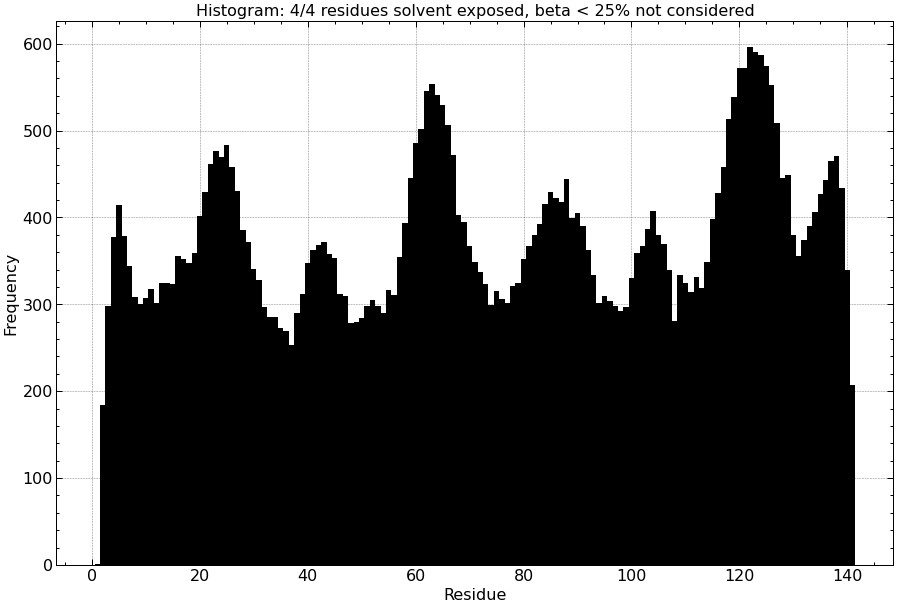

In [5]:
cluster_residues = (np.genfromtxt("all_clusters.txt")+1)
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,10))
plt.hist(cluster_residues, bins=np.arange(cluster_residues.min(), cluster_residues.max()+2)-0.5)
plt.title("Histogram: 4/4 residues solvent exposed, beta < 25% not considered")
plt.ylabel("Frequency")
plt.xlabel("Residue")

Text(0.07, 0.5, 'Frequency')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


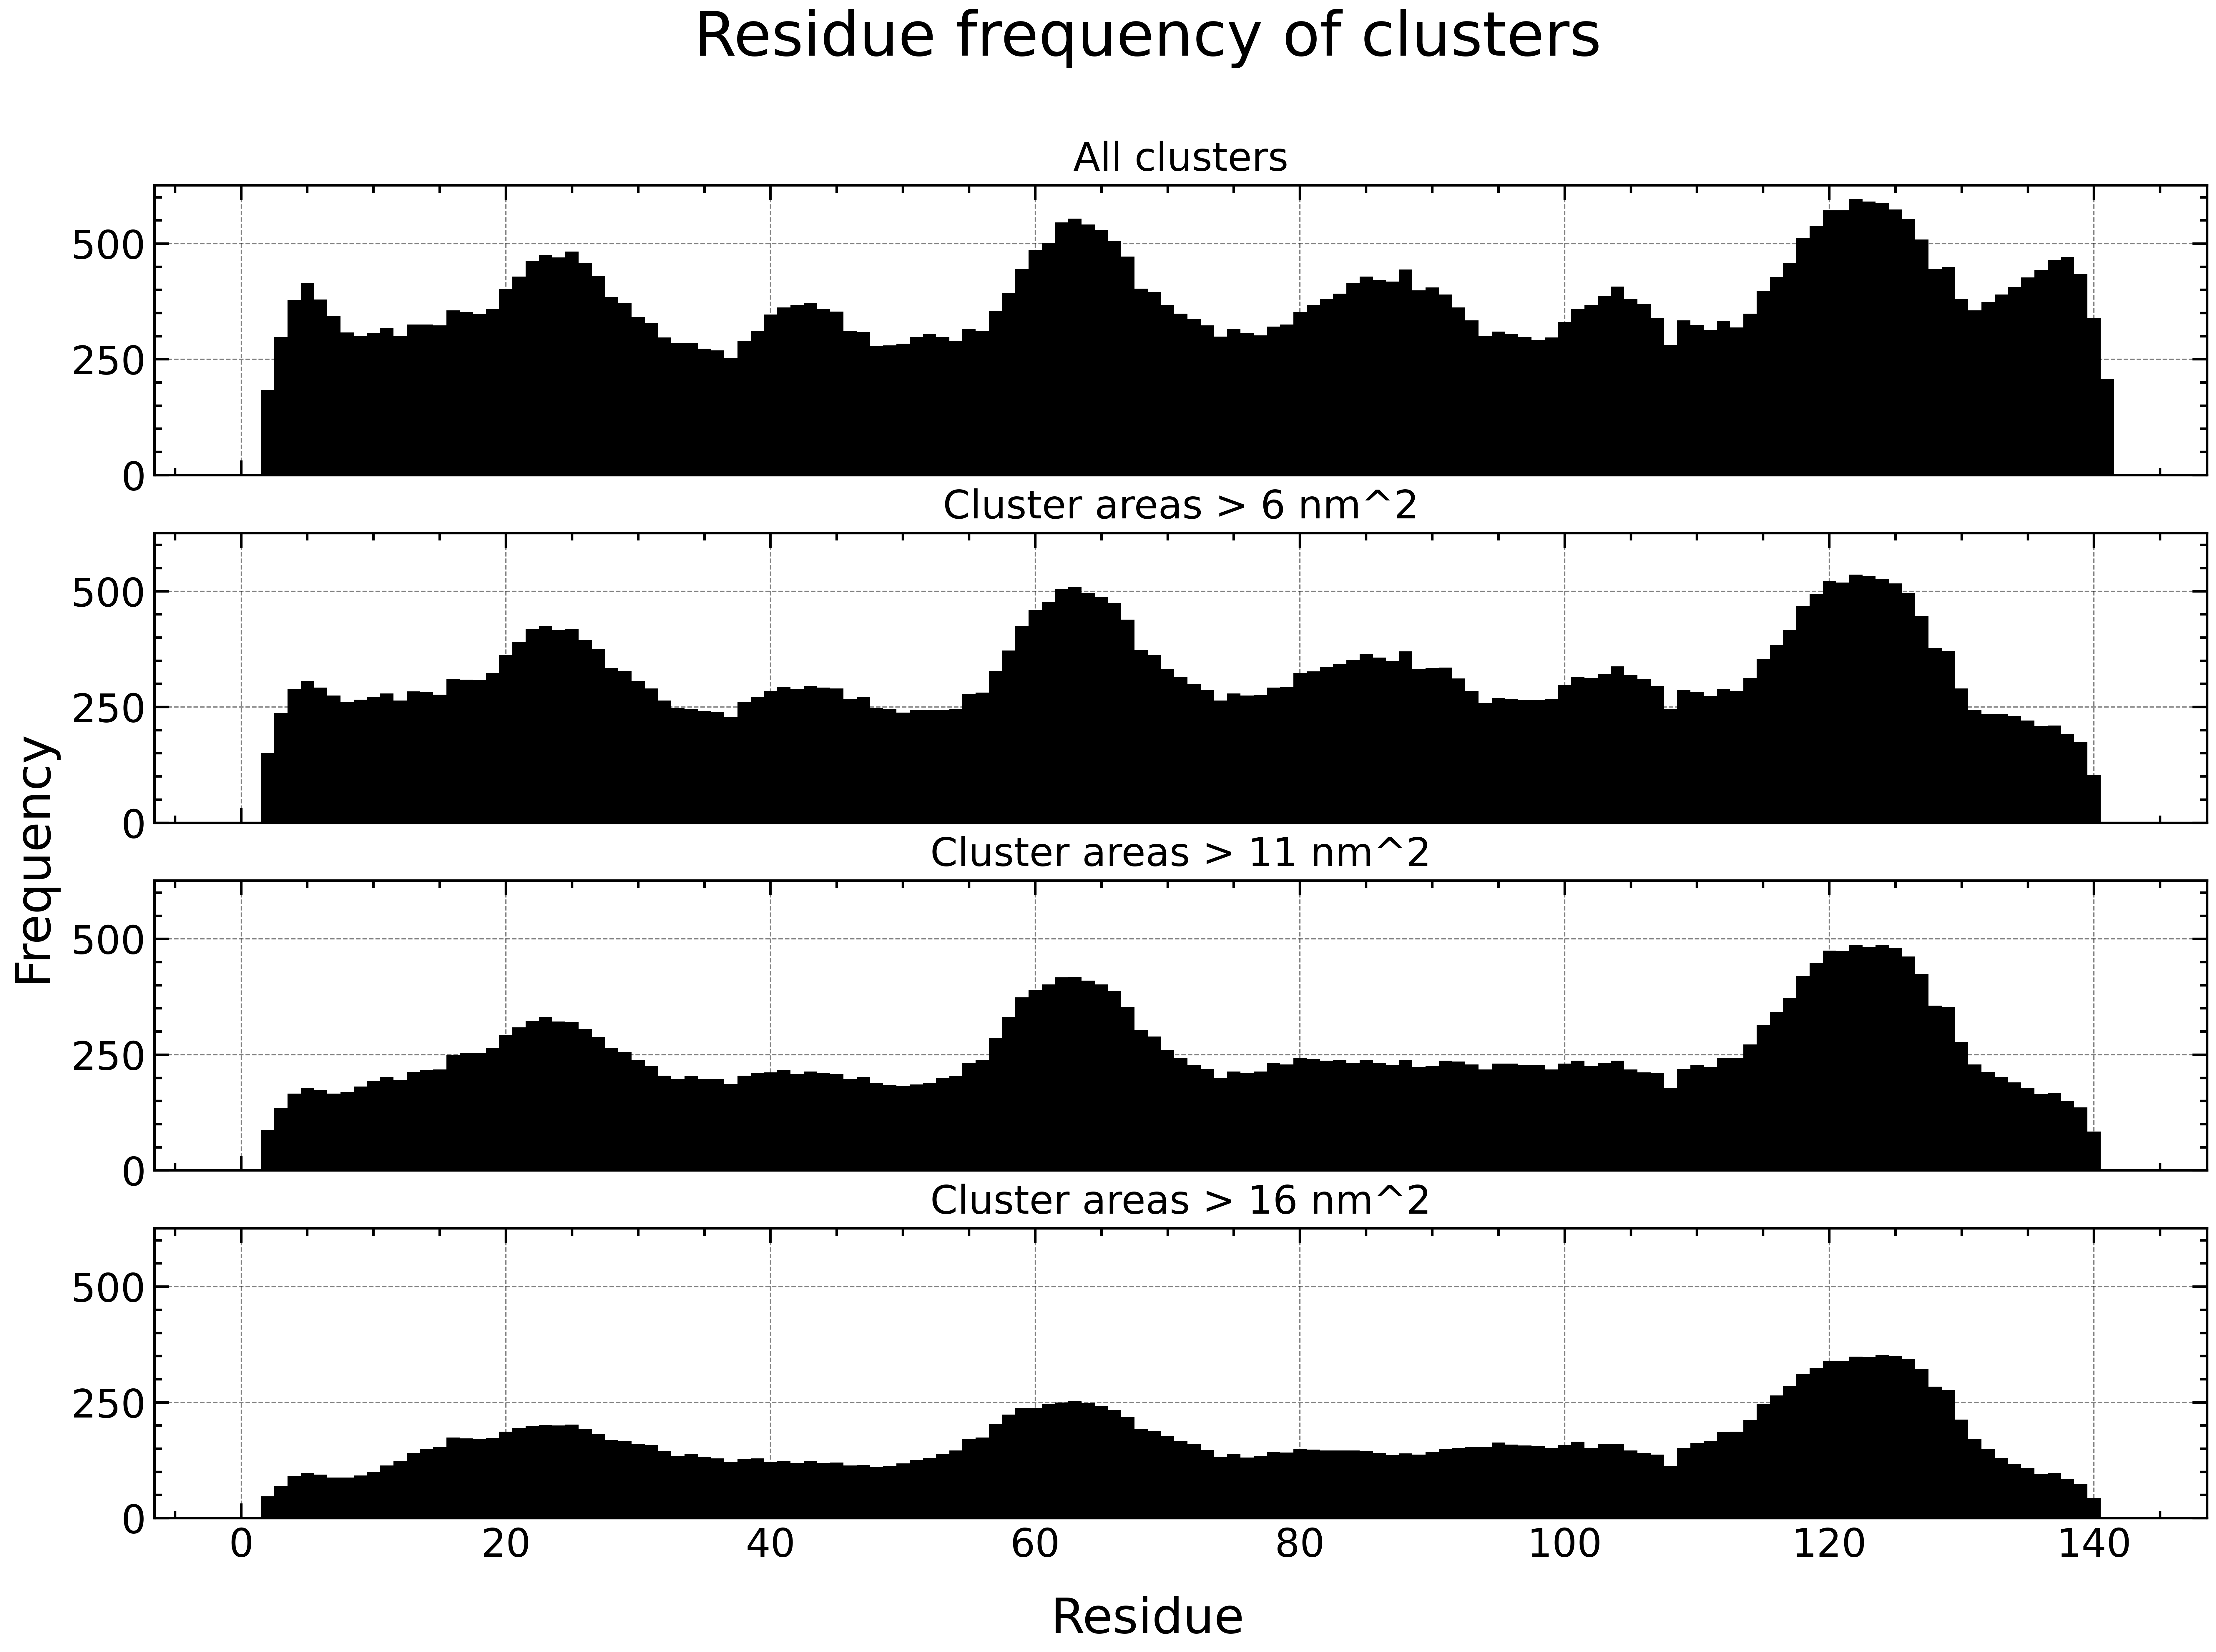

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib

matplotlib.rcParams['text.usetex'] = True

plt.style.use(['science','notebook','ieee','grid'])
plt.rcParams['font.size'] = '12'


fig, axs = plt.subplots(4, sharex=True, sharey=True, figsize=(15,10))
fig.suptitle('Residue frequency of clusters', fontsize=25)

cluster_residues = (np.genfromtxt("all_clusters.txt")+1)
axs[0].hist(cluster_residues, bins=np.arange(cluster_residues.min(), cluster_residues.max()+2)-0.5)
axs[0].set_title('All clusters')

cluster_residues = (np.genfromtxt("600area_clusters.txt")+1)
axs[1].hist(cluster_residues, bins=np.arange(cluster_residues.min(), cluster_residues.max()+2)-0.5)
axs[1].set_title('Cluster areas > 6 nm^2')

cluster_residues = (np.genfromtxt("1100area_clusters.txt")+1)
axs[2].hist(cluster_residues, bins=np.arange(cluster_residues.min(), cluster_residues.max()+2)-0.5)
axs[2].set_title('Cluster areas > 11 nm^2')

cluster_residues = (np.genfromtxt("1600area_clusters.txt")+1)
axs[3].hist(cluster_residues, bins=np.arange(cluster_residues.min(), cluster_residues.max()+2)-0.5, label='xyz')
axs[3].set_title('Cluster areas > 16 nm^2')


fig.text(0.5, 0.06, 'Residue', ha='center', fontsize=20)
fig.text(0.07, 0.5, 'Frequency', va='center', rotation='vertical', fontsize =20)

#plt.savefig('residue_frequency.jpg', dpi=600, transparent=True)

## Greater than 6 nm^2 only plotted

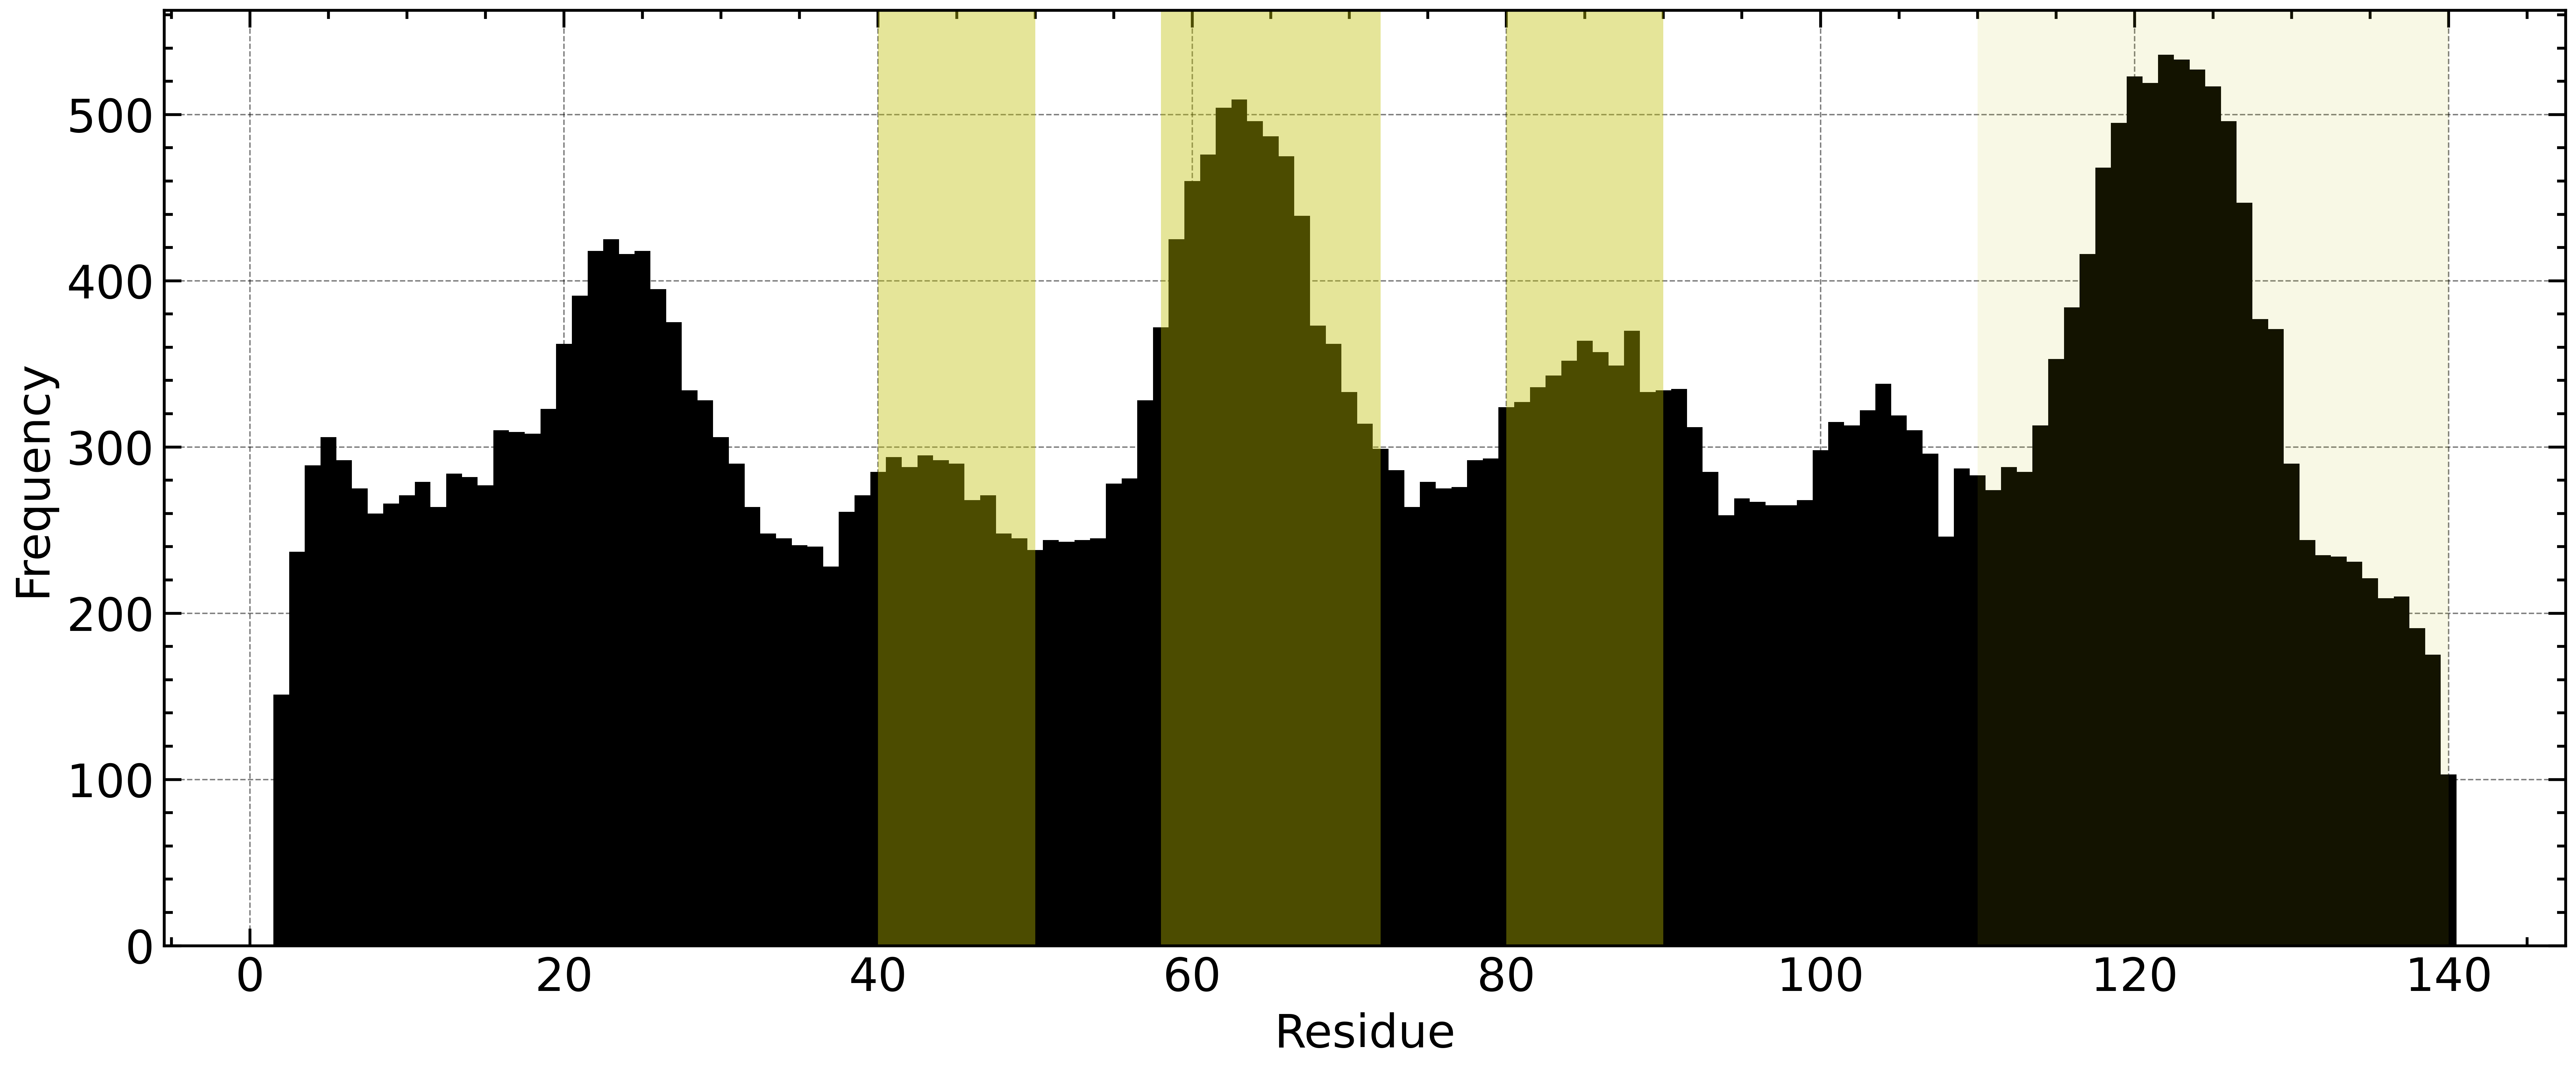

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
plt.style.use(['science','notebook','ieee','grid'])

cluster_residues = (np.genfromtxt("600area_clusters.txt")+1)
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,6))
plt.hist(cluster_residues, bins=np.arange(cluster_residues.min(), cluster_residues.max()+2)-0.5)
#plt.title("")
plt.ylabel("Frequency")
plt.xlabel("Residue")

plt.axvspan(40, 50, color='y', alpha=0.4, lw=0)
plt.axvspan(58, 72, color='y', alpha=0.4, lw=0)
plt.axvspan(80, 90, color='y', alpha=0.4, lw=0)
plt.axvspan(110, 140, color='y', alpha=0.1, lw=0)

